# Hipótesis 1:

### "Las provincias con una edad media menor y una renta media por hogar mayor a la nacional, suelen estar más concienciadas con el uso de energías renovables y utilizan más dispositivos que aprovechan este tipo de energía."

La justificación de esta hipótesis es que las personas jóvenes suelen estar más concienciadas con el medio ambiente, además de que tienen más tiempo para amortizar la inversión de este tipo de tecnología a lo largo de su vida.

<br>

### Preparación del entorno

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import numpy as np
from ydata_profiling import ProfileReport
import os 
import scipy

SILVER_DATA_PATH = os.path.join("..", "..", "data/silver/")
GOLD_DATA_PATH = os.path.join("..", "..", "data/gold/")

c:\Users\Francisco Javier\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<br>

### Datos

Primero, cargamos el dataset correspondiente a la tarjeta de datos 1.

In [2]:
h1_df=pd.read_csv(GOLD_DATA_PATH+"data_card_1_df.csv", sep = ";", encoding = "latin")
h1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Provincias                                                   47 non-null     object 
 1   Población Total                                              47 non-null     int64  
 2   Renta media por hogar                                        47 non-null     int64  
 3   Edad media                                                   47 non-null     float64
 4   Porcentaje de hogares con dispositivos de energía renovable  47 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


In [3]:
# Ejemplo de los datos que presenta la tabla
h1_df.head(5)

,Provincias,Población Total,Renta media por hogar,Edad media,Porcentaje de hogares con dispositivos de energía renovable
0,Albacete,385727,30908,43.677523,4.314062
1,Alicante/Alacant,1901594,28965,43.766889,4.036060
2,Almería,740534,28442,40.320448,6.713842
3,Araba/Álava,334412,38586,44.565691,10.445424
4,Asturias,1004686,33242,48.683390,5.031368


<br>

### Prueba obteniendo porcentaje entre edades

In [4]:
edades_df =pd.read_csv(SILVER_DATA_PATH+"distribucion_edad.csv", sep = ";", encoding = "latin")
edades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Provincias                  987 non-null    object
 1   Edad (grupos quinquenales)  987 non-null    object
 2   Total                       987 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 23.3+ KB


In [5]:
# Crear una nueva columna 'Rango_Edad' que contiene el rango de edad como texto
def obtener_rango_edad(edad):
    if 'De 0 a 4' in edad or 'De 5 a 9' in edad or 'De 10 a 14' in edad or 'De 15 a 19' in edad or 'De 20 a 24' in edad or 'De 25 a 29' in edad:
        return 'Menor de 30'
    elif 'De 30 a 34' in edad or 'De 35 a 39' in edad or 'De 40 a 44' in edad or 'De 45 a 49' in edad or 'De 50 a 54' in edad or 'De 55 a 59' in edad:
        return 'De 30 a 60'
    else:
        return 'Mayor de 60'

# Aplicar la función a la columna 'Edad (grupos quinquenales)'
edades_df['Rango_Edad'] = edades_df['Edad (grupos quinquenales)'].apply(obtener_rango_edad)

# Filtrar y agrupar los datos por provincia y rango de edad, sumando las personas en cada grupo
agrupado = edades_df.groupby(['Provincias', 'Rango_Edad'])['Total'].sum().unstack(fill_value=0)

# Calcular el total por provincia
agrupado['Total_Provincia'] = agrupado.sum(axis=1)

# Calcular los porcentajes por cada rango de edad
agrupado['% Menor de 30'] = (agrupado['Menor de 30'] / agrupado['Total_Provincia']) * 100
agrupado['% De 30 a 60'] = (agrupado['De 30 a 60'] / agrupado['Total_Provincia']) * 100
agrupado['% Mayor de 60'] = (agrupado['Mayor de 60'] / agrupado['Total_Provincia']) * 100

# Mostrar el resultado final con los porcentajes
resultados = agrupado[['% Menor de 30', '% De 30 a 60', '% Mayor de 60']]
resultados.head(5)


Rango_Edad,% Menor de 30,% De 30 a 60,% Mayor de 60
Provincias,,,
Albacete,29.847535,43.625932,26.526533
Alicante/Alacant,29.139185,43.604103,27.256712
Almería,33.463150,45.202516,21.334334
Araba/Álava,28.081229,43.377630,28.541141
Asturias,22.114372,42.640686,35.244942


<br>

In [6]:
df_completo = pd.merge(h1_df, resultados, how='left', on='Provincias')

# Verifica cómo ha quedado el DataFrame unido
df_completo.head(5)

,Provincias,Población Total,Renta media por hogar,Edad media,Porcentaje de hogares con dispositivos de energía renovable,% Menor de 30,% De 30 a 60,% Mayor de 60
0,Albacete,385727,30908,43.677523,4.314062,29.847535,43.625932,26.526533
1,Alicante/Alacant,1901594,28965,43.766889,4.036060,29.139185,43.604103,27.256712
2,Almería,740534,28442,40.320448,6.713842,33.463150,45.202516,21.334334
3,Araba/Álava,334412,38586,44.565691,10.445424,28.081229,43.377630,28.541141
4,Asturias,1004686,33242,48.683390,5.031368,22.114372,42.640686,35.244942


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
X = df_completo.drop(columns=['Provincias', 'Población Total', 'Edad media', '% Mayor de 60'])
scaler = StandardScaler()
h1_df_scaled = scaler.fit_transform(X)

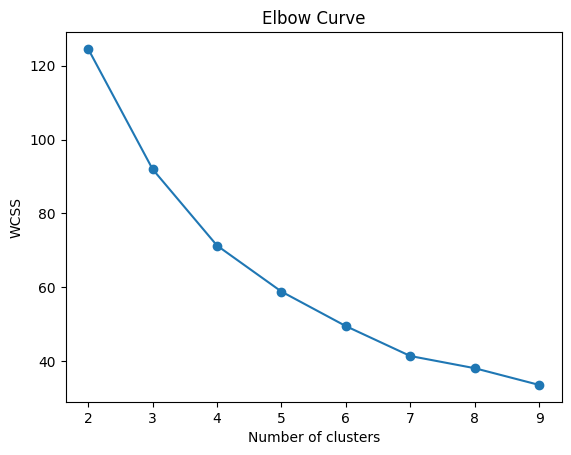

In [9]:
# https://www.youtube.com/watch?v=R4DHQs8hi0g
wcss = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(h1_df_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(2,10), wcss, marker= 'o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

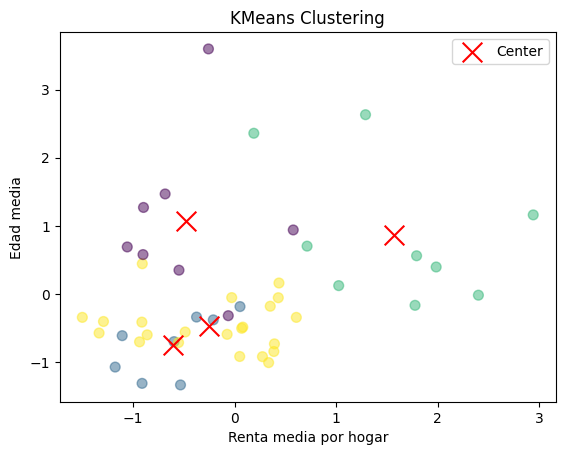

In [10]:
k = 4 # grupos

# Se entrena el modelo
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(h1_df_scaled)

# Clusters
cluster_labels = kmeans.labels_

# Gráfica para visualizar los clusters
plt.scatter(h1_df_scaled[:, 0], h1_df_scaled[:, 1], c=cluster_labels, cmap='viridis', s= 50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c= 'red', marker='x', s=200, label= 'Center')
plt.xlabel('Renta media por hogar')
plt.ylabel('Edad media')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

<br>